In [16]:
library(VIM)
library(mice)


Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind




In [2]:
data <- airquality
head(data,20)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9


In [5]:
data[4:10,3] <- rep(NA,7)
data[1:5,4] <- NA
head(data,20)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,NA,5,1
2,36,118,8.0,NA,5,2
3,12,149,12.6,NA,5,3
4,18,313,NA,NA,5,4
5,NA,NA,NA,NA,5,5
6,28,NA,NA,66,5,6
7,23,299,NA,65,5,7
8,19,99,NA,59,5,8
9,8,19,NA,61,5,9


In [6]:
data <- data[-c(5,6)]
summary(data)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :57.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:73.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.806   Mean   :78.28  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7       NA's   :7        NA's   :5      

In [10]:
pMiss <- function(x){sum(is.na(x))/length(x)*100}
as.data.frame(apply(data,2,pMiss))
apply(data,1,pMiss)

,"apply(data, 2, pMiss)"
,<dbl>
Ozone,24.183007
Solar.R,4.575163
Wind,4.575163
Temp,3.267974


[1]  25  25  25  50 100  50  25  25  25  50  25   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0  25  25  50   0   0   0   0  25  25  25  25  25
 [37]  25   0  25   0   0  25  25   0  25  25   0   0   0   0   0  25  25  25
 [55]  25  25  25  25  25  25  25   0   0   0  25   0   0   0   0   0   0  25
 [73]   0   0  25   0   0   0   0   0   0   0  25  25   0   0   0   0   0   0
 [91]   0   0   0   0   0  25  25  25   0   0   0  25  25   0   0   0  25   0
[109]   0   0   0   0   0   0  25   0   0   0  25   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0  25   0   0   0


 Variables sorted by number of missings: 
 Variable      Count
    Ozone 0.24183007
  Solar.R 0.04575163
     Wind 0.04575163
     Temp 0.03267974


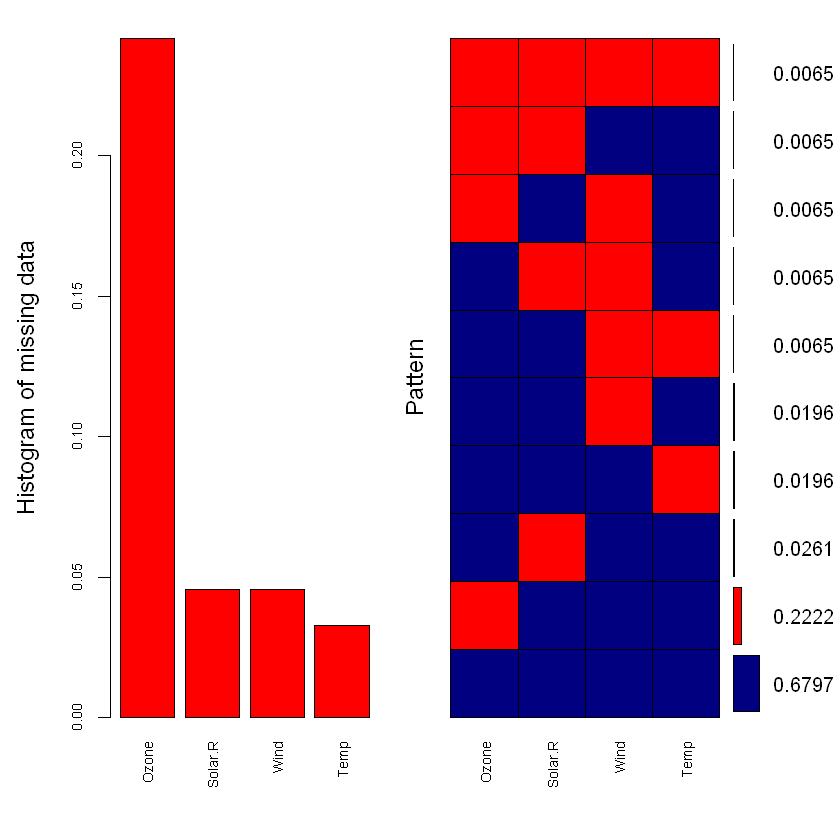

In [13]:
aggr_plot <- aggr(data, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

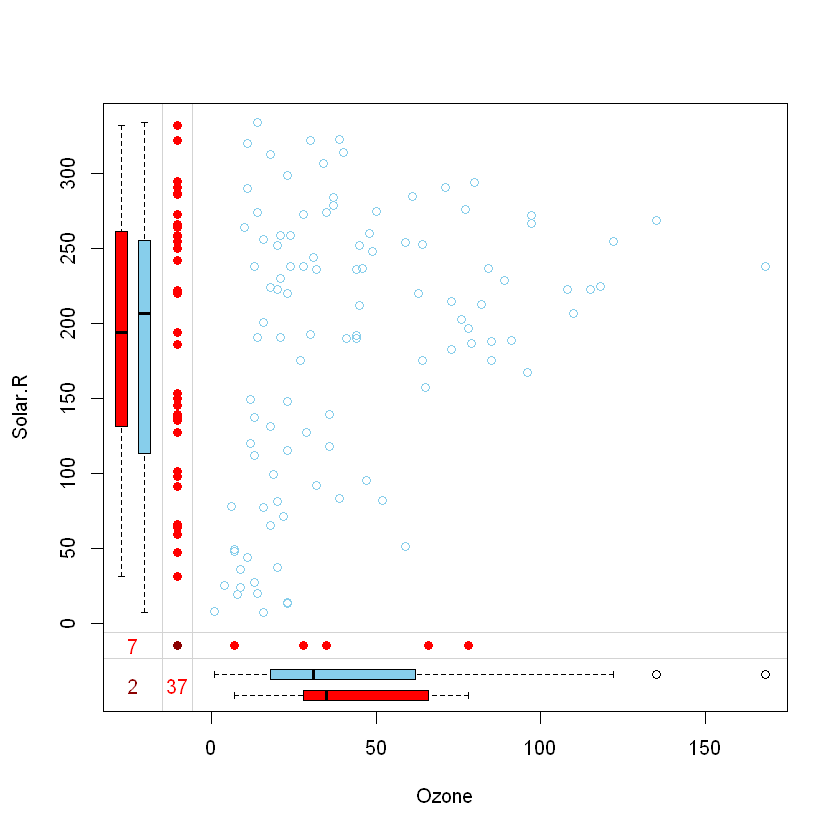

In [14]:
marginplot(data[c(1,2)])

In [17]:
tempData <- mice(data,m=5,maxit=50,meth='pmm',seed=500)
summary(tempData)


 iter imp variable
  1   1  Ozone  Solar.R  Wind  Temp
  1   2  Ozone  Solar.R  Wind  Temp
  1   3  Ozone  Solar.R  Wind  Temp
  1   4  Ozone  Solar.R  Wind  Temp
  1   5  Ozone  Solar.R  Wind  Temp
  2   1  Ozone  Solar.R  Wind  Temp
  2   2  Ozone  Solar.R  Wind  Temp
  2   3  Ozone  Solar.R  Wind  Temp
  2   4  Ozone  Solar.R  Wind  Temp
  2   5  Ozone  Solar.R  Wind  Temp
  3   1  Ozone  Solar.R  Wind  Temp
  3   2  Ozone  Solar.R  Wind  Temp
  3   3  Ozone  Solar.R  Wind  Temp
  3   4  Ozone  Solar.R  Wind  Temp
  3   5  Ozone  Solar.R  Wind  Temp
  4   1  Ozone  Solar.R  Wind  Temp
  4   2  Ozone  Solar.R  Wind  Temp
  4   3  Ozone  Solar.R  Wind  Temp
  4   4  Ozone  Solar.R  Wind  Temp
  4   5  Ozone  Solar.R  Wind  Temp
  5   1  Ozone  Solar.R  Wind  Temp
  5   2  Ozone  Solar.R  Wind  Temp
  5   3  Ozone  Solar.R  Wind  Temp
  5   4  Ozone  Solar.R  Wind  Temp
  5   5  Ozone  Solar.R  Wind  Temp
  6   1  Ozone  Solar.R  Wind  Temp
  6   2  Ozone  Solar.R  Wind  Temp
  6   3 

In [18]:
tempData$imp$Ozone

,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>
5,13,19,12,115,63
10,30,12,13,21,7
25,8,28,6,18,28
26,9,32,4,18,37
27,37,21,4,32,32
32,40,39,35,32,47
33,44,28,36,52,20
34,20,23,37,37,19
35,32,28,16,32,35


In [19]:
completedData <- complete(tempData,1)

In [20]:
completedData

Ozone,Solar.R,Wind,Temp
<int>,<int>,<dbl>,<int>
41,190,7.4,87
36,118,8.0,80
12,149,12.6,74
18,313,10.9,66
13,81,16.6,57
28,78,7.4,66
23,299,10.9,65
19,99,10.9,59
8,19,14.9,61
